In [21]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt   #We use matplotlib library for plotting
import matplotlib.image as mpimg  
import matplotlib.colors as clr
import numpy as np 
import cv2 as cv

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

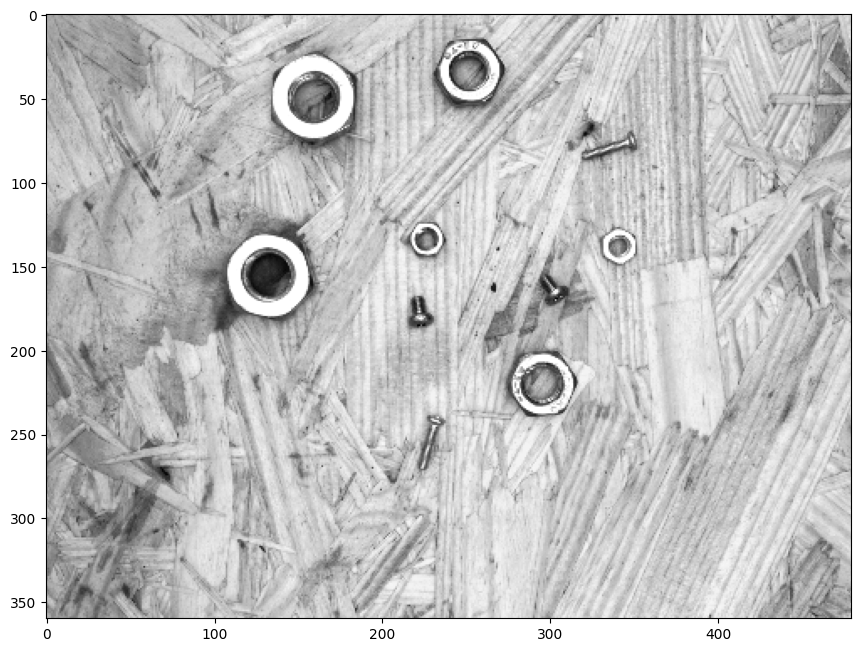

In [23]:
img = cv.imread("test_data/screws_037.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.resize(img, (480, 360))
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

Text(0.5, 1.0, 'Blur + Morph + Threshold')

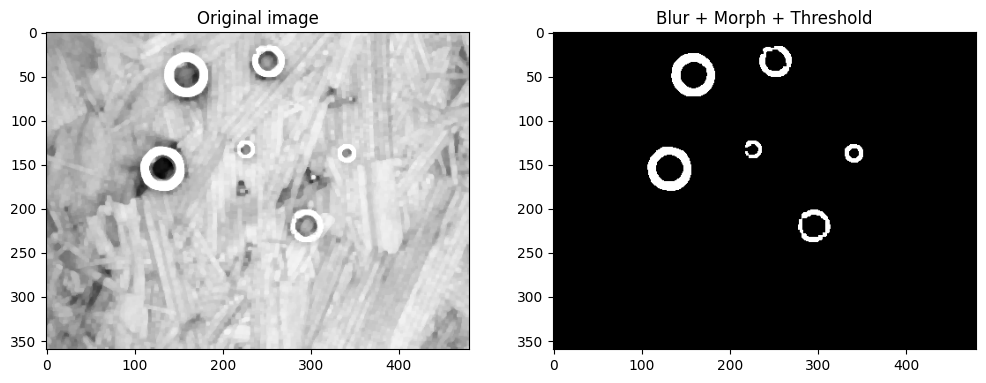

In [24]:
median = cv.medianBlur(gray, 3)
kernel = np.ones((3,3),np.uint8)

dilation = cv.morphologyEx(median, cv.MORPH_DILATE, kernel)
closing = cv.morphologyEx(dilation, cv.MORPH_CLOSE, kernel)
_, thresh = cv.threshold(closing, 250, 255, cv.THRESH_BINARY)


fig, axs = plt.subplots(1,2)
axs[0].imshow(closing, cmap = 'gray') #, clim = (220,250))
axs[0].set_title('Original image')
axs[1].imshow(thresh, cmap = 'gray')
axs[1].set_title('Blur + Morph + Threshold')

5


Text(0.5, 1.0, 'Blur + Morph + Threshold')

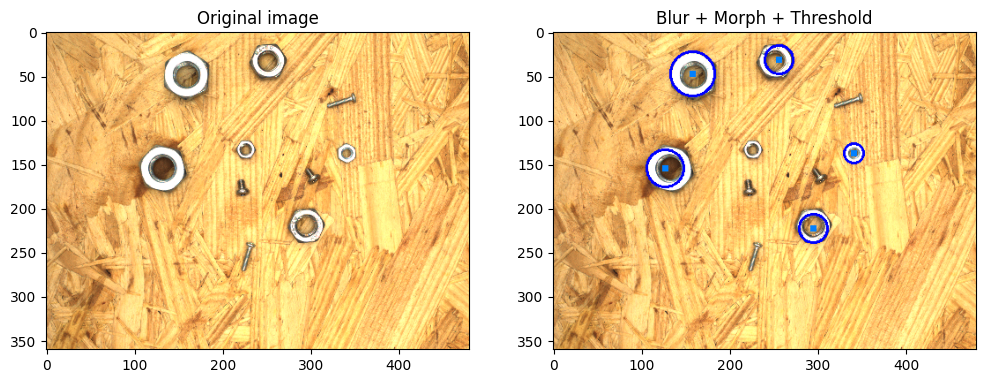

In [25]:
copy = img.copy()
size = (np.max(gray))/16
circles = cv.HoughCircles(thresh, cv.HOUGH_GRADIENT, 1.4, size, param1=300, param2=31, minRadius=0,maxRadius=70)
num = len(circles[0])
print(len(circles[0]))
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    for (x, y, r) in circles:
        cv.circle(copy, (x, y), r, (0, 0, 255), 2)
        cv.rectangle(copy, (x - 3, y - 3), (x + 3, y + 3), (0, 128, 255), -1)
        
fig, axs = plt.subplots(1,2)
axs[0].imshow(img) #, clim = (220,250))
axs[0].set_title('Original image')
axs[1].imshow(copy)
axs[1].set_title('Blur + Morph + Threshold')

6


Text(0.5, 1.0, 'Blur + Morph + Threshold')

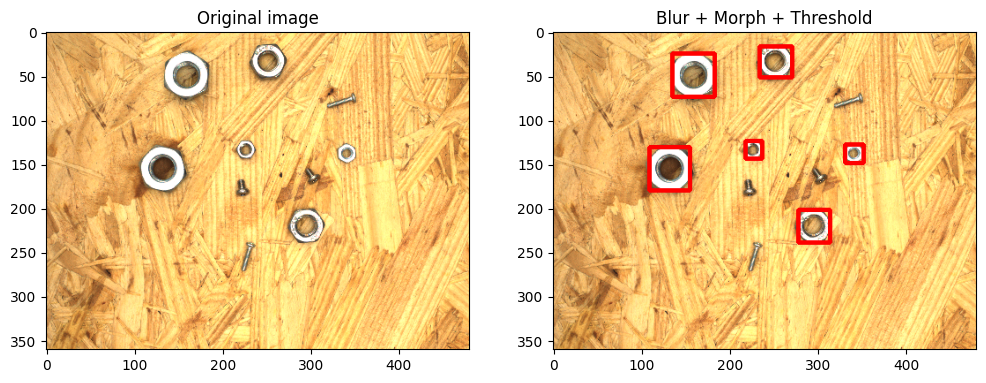

In [26]:
fidelity = False
fidelityValue = 1.7

copy1 = img.copy()
c, h = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
fidelityRange = 0
if fidelity:
    maxArea = .0
    for i in c: # With images it is convenient to know the greater area
        area = cv.contourArea(i)
        if area > maxArea:
            maxArea = area
    fidelityRange = maxArea - (maxArea * fidelityValue) # If objects have same size it prevents false detection

totalContours = 0

br = []
for i in range(len(c)):
    if h[0][i][3] == -1 and cv.contourArea(c[i]) >= fidelityRange:
        totalContours += 1
        approx = cv.approxPolyDP(c[i], 3, True)
        br.append(cv.boundingRect(approx))
for b in br:
    cv.rectangle(copy1, (b[0], b[1]), (b[0] + b[2], b[1] + b[3]), (255, 0, 0), 3)
    
print(totalContours)
    
fig, axs = plt.subplots(1,2)
axs[0].imshow(img) #, clim = (220,250))
axs[0].set_title('Original image')
axs[1].imshow(copy1)
axs[1].set_title('Blur + Morph + Threshold')